## 0

Объявление данных для работы, небольшие изменения по сравнению с тем, как это сделано в методичке

In [1]:
id <- 1:3
country <- c("Flatland", "Wonderland", "Sphereland")
craziness <- c(20, 15, 18)
region_type <- c("A", "B", "A")
author <- c("Abbot", "Carroll", "Burger")
size <- c(10, 100, 30)

df <- data.frame(id, country, craziness, region_type, author, size)

In [2]:
df

id,country,craziness,region_type,author,size
1,Flatland,20,A,Abbot,10
2,Wonderland,15,B,Carroll,100
3,Sphereland,18,A,Burger,30


In [3]:
sapply(df, class)

id     country   craziness region_type      author        size 
  "integer"    "factor"   "numeric"    "factor"    "factor"   "numeric"

## 1

Описывает, сколько переменных указанных типов в dataframe'е

In [4]:
first <- function(df, describeVector=c("numeric", "factor", "character")) {
    #classes <- sapply(df, class)
    classes <- c()
    for (i in 1:length(df[1,])) {
        classes <- c(classes, class(df[,i]))
    }
    # ;)
    classes <- table(classes)
    
    naToZero <- function(x) if (is.na(x)) 0 else x
    for (name in describeVector) {
        classes[name] <- naToZero(classes[name])
    }
    
    return (c(classes[describeVector]))
}

In [5]:
first(df)

numeric    factor character 
        2         3         0

## 2

А эта выбирает только столбцы указанного типа

In [6]:
second <- function(df, choose='numeric') {
    result <- data.frame(temp = rep(c(0), length(df[1,])))
    for (i in 1:length(df[1,])) {
        if (class(df[,i]) == choose) {
            result[colnames(df[i])] <- df[i]
        }
    }
    
    result <- result[-1]
    
    return (result)
}

In [7]:
second(df)

craziness,size
20,10
15,100
18,30
20,10
15,100
18,30


## 4

In [8]:
four <- function(vector) {
    if (class(vector) == "numeric") {
        return (median(vector))
    }
    else {
        print("Vector is not numeric, cannot compute the median")
        return (NA)
    }
}

In [9]:
four(c(1, 2, 3, 4, 5, 6))

[1] 3.5

In [10]:
four("Hello")

[1] "Vector is not numeric, cannot compute the median"


[1] NA

# Анализ временных рядов

In [11]:
if ("quantmod" %in% rownames(installed.packages()) == FALSE) {
    install.packages("quantmod") 
}
library(quantmod)

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following object is masked _by_ '.GlobalEnv':

    first

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [12]:
if ("stringr" %in% rownames(installed.packages()) == FALSE) {
    install.packages("stringr") 
}
library(stringr)

Warning message:
"package 'stringr' was built under R version 3.6.3"

In [13]:
downloadable_stocks <- c("ATVI", "^IXIC")

In [14]:
quantmod::getSymbols(Symbols = downloadable_stocks, src = "yahoo", from = as.Date.character("1900-01-01"))

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "ATVI"  "^IXIC"

In [15]:
df <- data.frame(get(downloadable_stocks[1]))

In [16]:
downloadable_stocks <- stringr::str_remove(downloadable_stocks, "[:punct:\\^]")

In [17]:
rm(list = downloadable_stocks)

In [18]:
head(df)

,ATVI.Open,ATVI.High,ATVI.Low,ATVI.Close,ATVI.Volume,ATVI.Adjusted
1993-10-25,1.250000,1.250000,0.937500,0.937500,18000,0.840151
1993-10-26,1.229167,1.229167,0.854167,0.864583,189600,0.774806
1993-10-27,0.864583,0.864583,0.864583,0.864583,0,0.774806
1993-10-28,0.708333,0.833333,0.583333,0.822917,30000,0.737466
1993-10-29,0.875000,0.875000,0.833333,0.833333,172800,0.746801
1993-11-01,0.833333,0.875000,0.833333,0.875000,76800,0.784141


## 2

Реализация пропорций:

In [19]:
proportion <- function(x, dt, func) {
    stopifnot(is.vector(x) && class(x) == "numeric")
    stopifnot(is.numeric(dt) & dt %% 1 == 0 & dt > 0)
    stopifnot(2*dt < length(x))
    stopifnot(is.function(func))
    
    min_elem <- min(x)
    x <- sapply(x, function(x) x + min_elem + 1)
    
    y <- rep(c(0), length(x) - 2*dt)
    for (i in (1 + dt):(length(x) - dt)) {
        y[i - dt] <- func(x[i - dt], x[i], x[i + dt])
    }
    
    return (y)
}

In [20]:
arifmProportion <- function(x, dt=1) proportion(x, dt, function(prev, current, nex) log((prev + nex) / (2*current)))

In [21]:
arifmProportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1]  0.2876821 -0.5389965  0.1823216

In [22]:
geomProportion <- function(x, dt=1) proportion(x, dt, function(prev, current, nex) log(prev * nex /  current^2))

In [23]:
geomProportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1]  0.51082562 -1.09861229  0.07696104

In [24]:
garmProportion <- function(x, dt=1) proportion(x, dt, function(prev, current, nex) log(2 * prev * nex / (current * (prev + nex))))

In [25]:
garmProportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1]  0.2231436 -0.5596158 -0.1053605

**Сама функция *out_of_trend***

In [26]:
out_of_trend <- function(x, dt=1, method="Arifm") {
    stopifnot(method == "Arifm" || method == "Geom" || method == "Garm")
    
    return (switch(method,
                  "Arifm"=arifmProportion(x, dt),
                  "Geom"=geomProportion(x, dt),
                  "Garm"=garmProportion(x, dt),
                  arifmProportion(x, dt)))
}

In [27]:
out_of_trend(c(1, 2, 1, 4, 3, 1, 7), 2) == arifmProportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1] TRUE TRUE TRUE

In [28]:
out_of_trend(c(1, 2, 1, 4, 3, 1, 7), 2, "Geom") == geomProportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1] TRUE TRUE TRUE

In [29]:
out_of_trend(c(1, 2, 1, 4, 3, 1, 7), 2, "Garm") == garmProportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1] TRUE TRUE TRUE

## 3

In [30]:
t = seq(0, 10, 0.1)

In [31]:
x = 2*t + 3 + sin(2*t)

In [32]:
mean(x)

[1] 13.03372

In [33]:
xn <- out_of_trend(x, method="Arifm")
mean(xn)

[1] -6.821495e-05

In [34]:
xn <- out_of_trend(x, method="Geom")
mean(xn)

[1] -0.0004506113

In [35]:
xn <- out_of_trend(x, method="Garm")
mean(xn)

[1] -0.0003823964

Ну вот мне кажется, что среднее геометрическое и гармоническое около нуля из-за этой фигни:

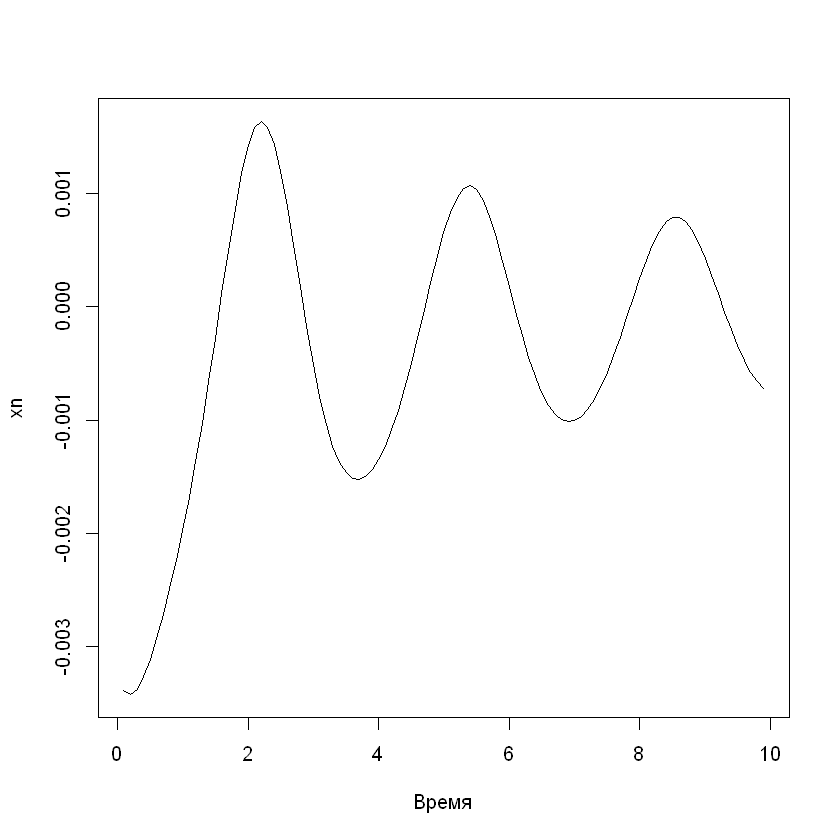

In [36]:
plot(t[2:(length(t) - 1)], xn, type="l", xlab="Время", ylab="xn")

## 4

In [37]:
AlterJohns_Tau <- function(y, tau) {
    stopifnot(is.vector(y) & is.numeric(y))
    n <- length(y)
    stopifnot(is.numeric(tau) & tau %% 1 == 0 & n > tau)
    
    summa <- 0
    for (i in 1:(n - tau)) {
        summa <- summa + abs(y[i + tau] - y[i])
    }
    
    return (1 / (n - tau) * summa)
}

AlterJohns <- function(y) {
    return (sapply(1:(length(y) - 1), function(i) (AlterJohns_Tau(y, i))))
}

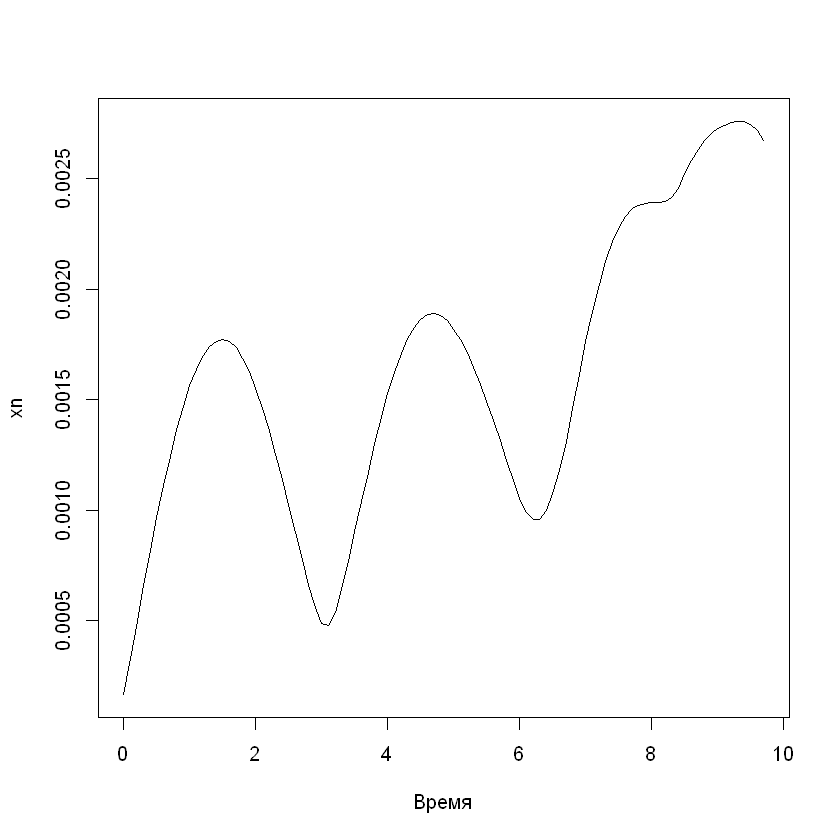

In [38]:
plot(t[1:(length(xn) - 1)], AlterJohns(xn), type="l", xlab="Время", ylab="xn")

## 6

In [39]:
out_of <- out_of_trend(df[[1]], method="Geom")

In [40]:
result <- AlterJohns(out_of)

In [41]:
head(result)

[1] 0.03859070 0.03154003 0.03186524 0.03190667 0.03234403 0.03152206

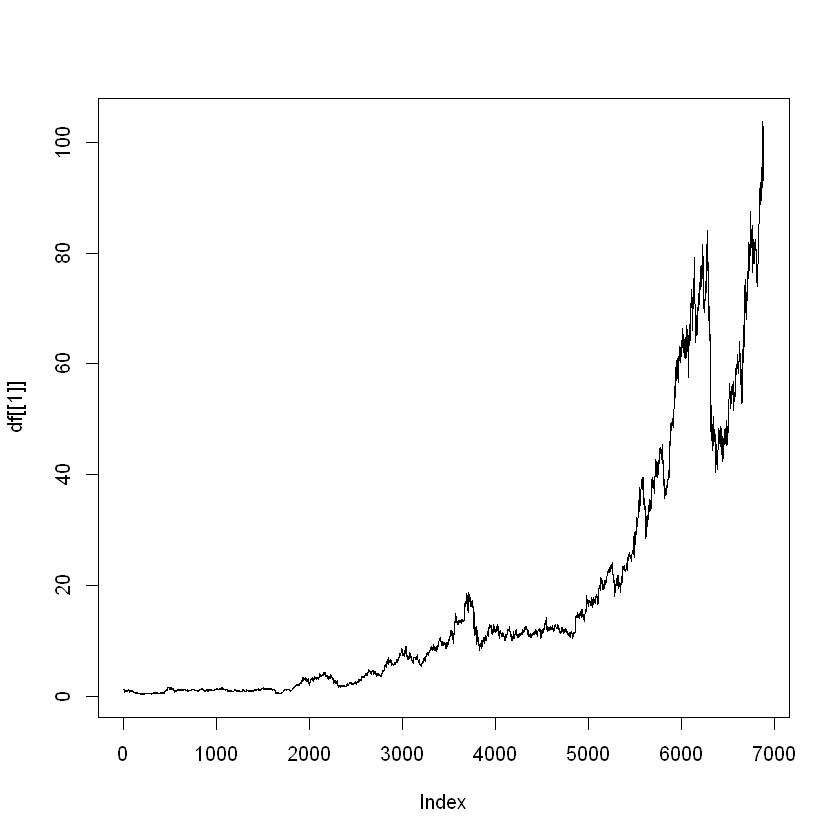

In [42]:
plot(df[[1]], type="l")

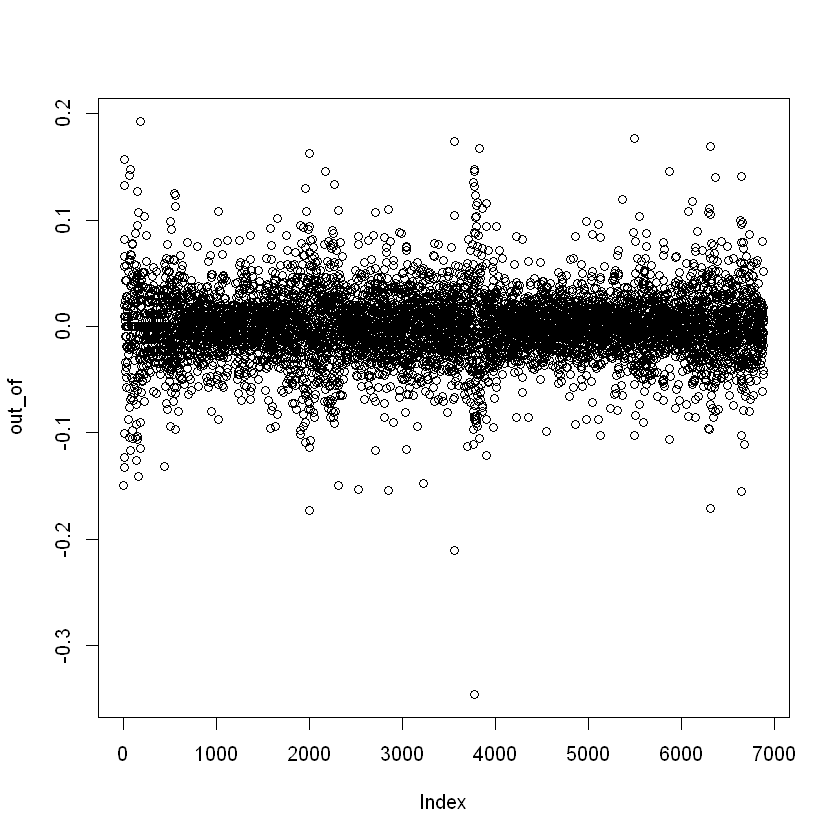

In [43]:
plot(out_of)